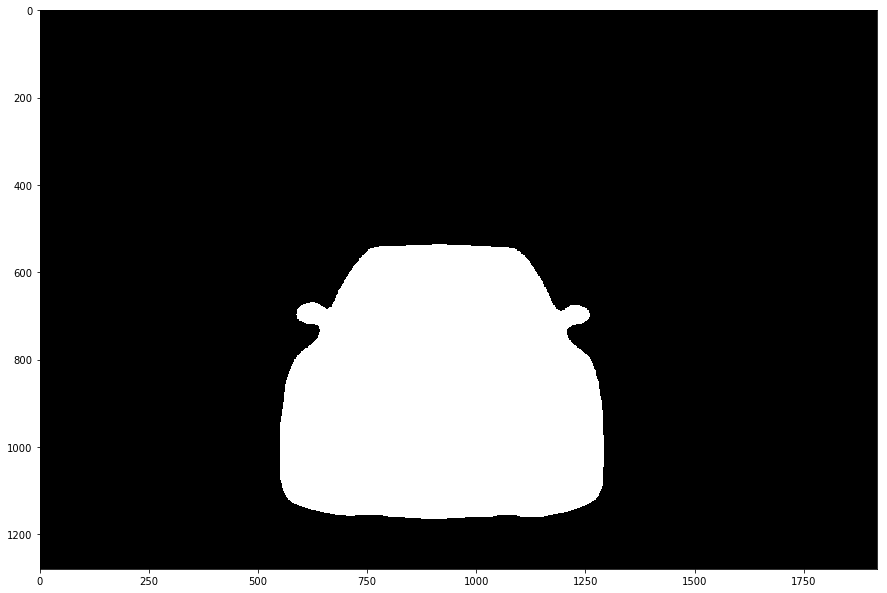

In [11]:
import cv2
import numpy as np
# visualise car error
from matplotlib import pyplot as plt
from skimage import measure, morphology


res = '../carvana/features/VGG_16/test/fc8/'
#res = '/media/Disk/wangfuyu/Carvana/train_hq/SegmentationClass/'

img = cv2.imread(res + '2ac699eaa74e_01.png')
#img = img * 255
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))

#plt.imshow(gray)
#plt.show()
ret, thresh = cv2.threshold(gray, 127, 255, 0)
# #plt.imshow(thresh)

_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


limg = measure.label(img)
props = measure.regionprops(limg)
props = sorted(props, key=lambda p: -p.area)
# mask operation
mask = np.uint64(limg == props[0].label)
img = np.uint64(img) & mask
img = np.uint8(img*255)
# #cv2.drawContours(img, contours, -1, (255, 0, 0), 30)

# ans_x = 0
# ans_y = 0
# ans_w = 0
# ans_h = 0
# max = 0
# for index, contour in enumerate(contours):
#     x, y, w, h = cv2.boundingRect(contour)
#     if w*h < 30000:
#         continue
    
#     if (w*h > max):
#         max = w * h
#         ans_x = x
#         ans_y = y
#         ans_w = w
#         ans_h = h
        
# ans_x -= 100
# ans_y -= 100
# ans_w+=200
# ans_h+=200
# img = cv2.rectangle(img, (ans_x, ans_y), (ans_x+ans_w, ans_y+ans_h), (0, 0, 255), 10)
# #digit = thresh[y:y+h, x:x+w]
# print ans_x, ans_y, ans_w, ans_h, ans_w*ans_h
    
plt.imshow(img)
plt.show()
   